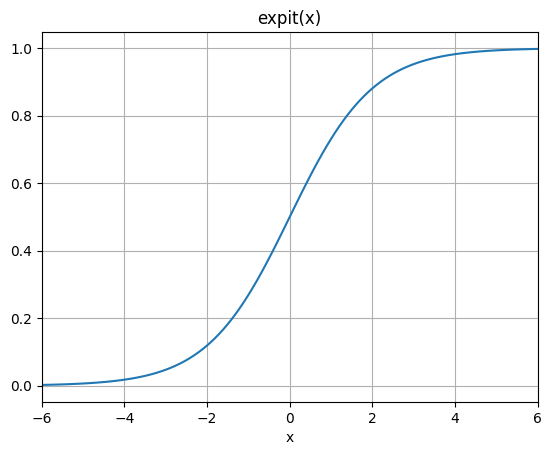

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit # подключаем функцию из библиотеки
x = np.linspace(-6, 6, 121) # диапазон по х
y = expit(x) # значение функции по у
plt.plot(x, y) #
plt.grid() #
plt.xlim(-6, 6)#
plt.xlabel('x')#
plt.title('expit(x)')#
plt.show()#

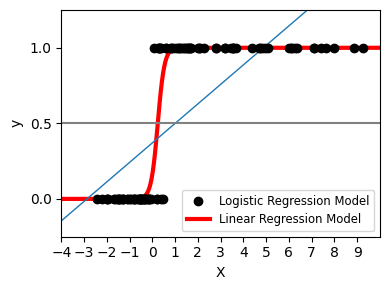

In [2]:
import matplotlib.pyplot as plt #
from sklearn import linear_model #
from scipy.special import expit # функция для сигмоиды
# создадим данные: два отрезка на уровне 0 и 1
n_samples = 100 # число примеров
np.random.seed(0) # инициализация генератора случайных чисел
X = 1*np.random.normal(size=n_samples) # случаные числа по х, с нормальным законом распр
y = (X > 0).astype(float) # класс 1 если больше нуля, 0 иначе, преобразуем в тип float
X[X > 0] *= 4 # умножим примеры входов из класса 1 на 4
X += .3 * np.random.normal(size=n_samples) # добавим ко всем примерам входа шум - случан
X = X[:, np.newaxis] # сделаем столбец, добавив новое измерение к массиву, был одномерны
# Обучение классификатора
log_reg = linear_model.LogisticRegression(C=1e5, max_iter=200) # создаем логистическую р
log_reg.fit(X, y) # обучаем модель, мы не стали разделять на обучающие и тестовые данные
# рисуем результат
plt.figure(1, figsize=(4, 3)) #
plt.clf() #
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300) # вот теперь создадим тестовые примеры входов
# посчитаем выход модели
loss = expit(X_test * log_reg.coef_ + log_reg.intercept_).ravel() # вручную
loss1 = log_reg.predict_proba(X_test[:, np.newaxis])[:,1].ravel() # через predict_proba,
plt.plot(X_test, loss1, color='red', linewidth=3) #
ols = linear_model.LinearRegression() # линейная регрессия
ols.fit(X, y) # обучаем ее
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
# рисуем
plt.axhline(.5, color='.5') #
plt.ylabel('y') #
plt.xlabel('X') #
plt.xticks(range(-5, 10)) #
plt.yticks([0, 0.5, 1]) #
plt.ylim(-.25, 1.25) #
plt.xlim(-4, 10) #
plt.legend(('Logistic Regression Model', 'Linear Regression Model'), #
loc="lower right", fontsize='small') #
plt.tight_layout() #

Обученные параметры b=[-0.00616075] a=[[0.02222096 0.02578357]]


(-40.0, 40.0)

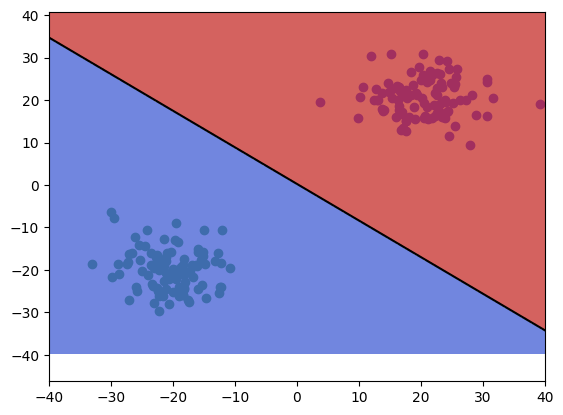

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model #
np.random.seed(42) # начало генератора случайных чисел, чтобы после перезапуска были оди
N=100 # число точек в одном классе
# первый класс, случайные точки вокруг (-20, -20) выход = -1
x1 = -20+5*np.random.randn(N, 1) #
y1 = -20+5*np.random.randn(N, 1) #
z1=-1*np.ones((100,1)) #
# второй класс, случайные точки вокруг (+20, +20) выход = +1
x2 = 20+5*np.random.randn(N, 1) #
y2 = 20+5*np.random.randn(N, 1) #
z2=+1*np.ones((100,1)) #
# большой выброс, раскомментируйте для теста
#x1[0]=+1000
#y1[0]=+1000
Input=np.hstack((np.vstack((x1, x2)),np.vstack((y1 , y2))))
Output=np.vstack((z1,z2))
#print(Input.shape)
#print(Output.shape)
fig, ax = plt.subplots()
# рисуем обучающие точки своим цветом
ax.scatter(Input[0:N-1,0],Input[0:N-1,1],color='green')
ax.scatter(Input[N:,0],Input[N:,1],color='blue')
# создаем и обучаем линейную регрессию
linr = linear_model.LinearRegression() # создадим ее. normalize=False если хотим без нор
linr.fit(Input, Output) # обучим модель, принудительно переформатировав размеры массивов
print('Обученные параметры b={d[0]} a={d[1]}'.format(d=(linr.intercept_, linr.coef_))) #
out_pred=linr.predict(Input)# посчитаем выход модели
# Если выход меньше нуля - принимаем за первый класс, если больше - за второй
# найдем ошибки, т.е. не совпадение между истинными классами и полученными моделью
err1=(out_pred>0) & (Output==-1)# думаем что второй, а на самом деле первый класс
err2=(out_pred<0) & (Output==+1)# думаем что первый, а на самом деле второй
err1=err1[:,0]
err2=err2[:,0]
# нарисуем ошибки
ax.scatter(Input[err1,0],Input[err1,1],color='yellow',marker='x')
ax.scatter(Input[err2,0],Input[err2,1],color='magenta',marker='x')
# возьмем много точек плоскости
h=0.2
x_min,y_min=Input.min(axis=0)-10
x_max, y_max=Input.max(axis=0)+10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # точки пло
Input_test=np.c_[xx.ravel(), yy.ravel()]
#print(Input.shape)
# посчитаем для них выходы обученной линейной регрессии
zz = linr.predict(Input_test)
zz = zz.reshape(xx.shape)
zz[zz>0]=1 # больше нуля - второй класс
zz[zz<0]=-1 # меньше нуля - первый класс
ax.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8); # рисуем цветом выходы для все
# рисуем прямую
xxx=np.arange(x_min,x_max,h)
yyy=-(linr.intercept_[0] + linr.coef_[0][0]*xxx)/linr.coef_[0][1] # x2=-(a1*x1+b)/a2
ax.plot(xxx,yyy,color='black');
ax.set_xlim([-40, 40])


Обученные параметры b=[-0.01243566] a=[[ 0.00620578 -0.00339532]]


(-40.0, 40.0)

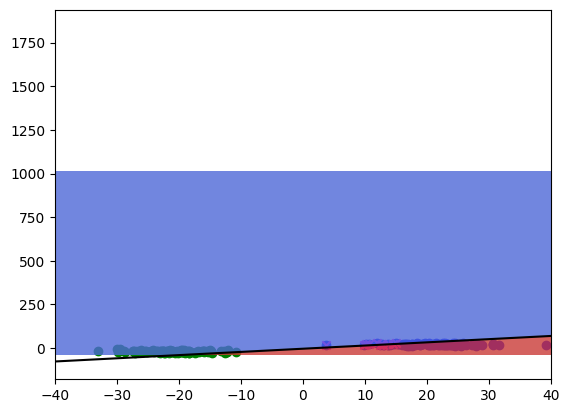

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model #
np.random.seed(42) # начало генератора случайных чисел, чтобы после перезапуска были оди
N=100 # число точек в одном классе
# первый класс, случайные точки вокруг (-20, -20) выход = -1
x1 = -20+5*np.random.randn(N, 1) #
y1 = -20+5*np.random.randn(N, 1) #
z1=-1*np.ones((100,1)) #
# второй класс, случайные точки вокруг (+20, +20) выход = +1
x2 = 20+5*np.random.randn(N, 1) #
y2 = 20+5*np.random.randn(N, 1) #
z2=+1*np.ones((100,1)) #
# большой выброс, раскомментируйте для теста
x1[0]=+1000
y1[0]=+1000
Input=np.hstack((np.vstack((x1, x2)),np.vstack((y1 , y2))))
Output=np.vstack((z1,z2))
#print(Input.shape)
#print(Output.shape)
fig, ax = plt.subplots()
# рисуем обучающие точки своим цветом
ax.scatter(Input[0:N-1,0],Input[0:N-1,1],color='green')
ax.scatter(Input[N:,0],Input[N:,1],color='blue')
# создаем и обучаем линейную регрессию
linr = linear_model.LinearRegression() # создадим ее. normalize=False если хотим без нор
linr.fit(Input, Output) # обучим модель, принудительно переформатировав размеры массивов
print('Обученные параметры b={d[0]} a={d[1]}'.format(d=(linr.intercept_, linr.coef_))) #
out_pred=linr.predict(Input)# посчитаем выход модели
# Если выход меньше нуля - принимаем за первый класс, если больше - за второй
# найдем ошибки, т.е. не совпадение между истинными классами и полученными моделью
err1=(out_pred>0) & (Output==-1)# думаем что второй, а на самом деле первый класс
err2=(out_pred<0) & (Output==+1)# думаем что первый, а на самом деле второй
err1=err1[:,0]
err2=err2[:,0]
# нарисуем ошибки
ax.scatter(Input[err1,0],Input[err1,1],color='yellow',marker='x')
ax.scatter(Input[err2,0],Input[err2,1],color='magenta',marker='x')
# возьмем много точек плоскости
h=0.2
x_min,y_min=Input.min(axis=0)-10
x_max, y_max=Input.max(axis=0)+10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # точки пло
Input_test=np.c_[xx.ravel(), yy.ravel()]
#print(Input.shape)
# посчитаем для них выходы обученной линейной регрессии
zz = linr.predict(Input_test)
zz = zz.reshape(xx.shape)
zz[zz>0]=1 # больше нуля - второй класс
zz[zz<0]=-1 # меньше нуля - первый класс
ax.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8); # рисуем цветом выходы для все
# рисуем прямую
xxx=np.arange(x_min,x_max,h)
yyy=-(linr.intercept_[0] + linr.coef_[0][0]*xxx)/linr.coef_[0][1] # x2=-(a1*x1+b)/a2
ax.plot(xxx,yyy,color='black');
ax.set_xlim([-40, 40])


Обученные параметры b=[-0.00030136] a=[[0.25898092 0.27060934]]


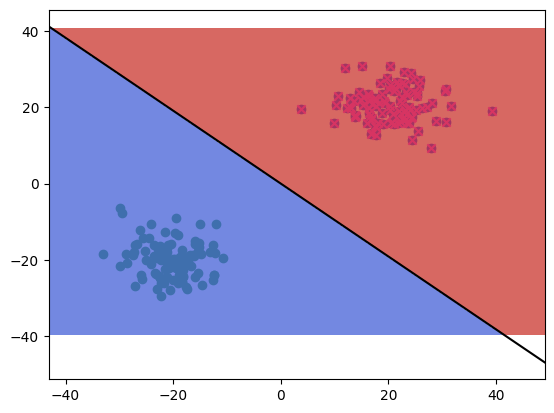

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model #
np.random.seed(42) # начало генератора случайных чисел, чтобы после перезапуска были оди
N=100
x1 = -20+5*np.random.randn(N, 1) #
y1 = -20+5*np.random.randn(N, 1) #
z1=0*np.ones((100,1)) # классы должны быть 0 или 1
x2 = 20+5*np.random.randn(N, 1) #
y2 = 20+5*np.random.randn(N, 1) #
z2=1*np.ones((100,1)) # классы должны быть 0 или 1
Input=np.hstack((np.vstack((x1, x2)),np.vstack((y1 , y2))))
Output=np.vstack((z1,z2))
#print(Input.shape)
#print(Output.shape)
fig, ax = plt.subplots()
ax.scatter(Input[0:N-1,0],Input[0:N-1,1],color='green')
ax.scatter(Input[N:,0],Input[N:,1],color='blue')
logr = linear_model.LogisticRegression() #
logr.fit(Input, Output.ravel()) # обучим модель,
print('Обученные параметры b={d[0]} a={d[1]}'.format(d=(logr.intercept_, logr.coef_))) #
out_pred=logr.predict(Input)# посчитаем выход модели
out_pred
# в логистической регресии predict возвращает классы, так что не надо самим относить вых
# больше 0.5 класс 1, меньше 0.5 класс 0.
err1=(out_pred==1) & (Output==0)
err2=(out_pred==0) & (Output==1)
err1=err1[:,0]
err2=err2[:,0]
ax.scatter(Input[err1,0],Input[err1,1],color='yellow',marker='x')
ax.scatter(Input[err2,0],Input[err2,1],color='magenta',marker='x')
h=0.2
x_min,y_min=Input.min(axis=0)-10
x_max, y_max=Input.max(axis=0)+10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Input_test=np.c_[xx.ravel(), yy.ravel()]
#print(Input.shape)
zz = logr.predict(Input_test)
zz = zz.reshape(xx.shape)
# в логистической регресии predict возвращает классы, так что не надо самим относить вых
#zz[zz>0]=1
#zz[zz<0]=-1
ax.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8);
xxx=np.arange(x_min,x_max,h)
# все равно это прямая линия, но возможно с другими коэффициентами
yyy=-(logr.intercept_[0] + logr.coef_[0][0]*xxx)/logr.coef_[0][1]
ax.plot(xxx,yyy,color='black');
